In [27]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
#load data
data = pd.read_csv("C:\Desktop\WineQT.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [4]:
print(data.shape)

(1143, 13)


In [5]:
data.describe(include = 'all')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [6]:
print(data.isna().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64


In [7]:
data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
fixed acidity,1.000000,-0.250728,0.673157,0.171831,0.107889,-0.164831,-0.110628,0.681501,-0.685163,0.174592,-0.075055,0.121970,-0.275826
volatile acidity,-0.250728,1.000000,-0.544187,-0.005751,0.056336,-0.001962,0.077748,0.016512,0.221492,-0.276079,-0.203909,-0.407394,-0.007892
citric acid,0.673157,-0.544187,1.000000,0.175815,0.245312,-0.057589,0.036871,0.375243,-0.546339,0.331232,0.106250,0.240821,-0.139011
residual sugar,0.171831,-0.005751,0.175815,1.000000,0.070863,0.165339,0.190790,0.380147,-0.116959,0.017475,0.058421,0.022002,-0.046344
chlorides,0.107889,0.056336,0.245312,0.070863,1.000000,0.015280,0.048163,0.208901,-0.277759,0.374784,-0.229917,-0.124085,-0.088099
free sulfur dioxide,-0.164831,-0.001962,-0.057589,0.165339,0.015280,1.000000,0.661093,-0.054150,0.072804,0.034445,-0.047095,-0.063260,0.095268
total sulfur dioxide,-0.110628,0.077748,0.036871,0.190790,0.048163,0.661093,1.000000,0.050175,-0.059126,0.026894,-0.188165,-0.183339,-0.107389
density,0.681501,0.016512,0.375243,0.380147,0.208901,-0.054150,0.050175,1.000000,-0.352775,0.143139,-0.494727,-0.175208,-0.363926
pH,-0.685163,0.221492,-0.546339,-0.116959,-0.277759,0.072804,-0.059126,-0.352775,1.000000,-0.185499,0.225322,-0.052453,0.132904
sulphates,0.174592,-0.276079,0.331232,0.017475,0.374784,0.034445,0.026894,0.143139,-0.185499,1.000000,0.094421,0.257710,-0.103954


In [8]:
data.groupby('quality').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Id
quality,,,,,,,,,,,,
3,8.450000,0.897500,0.211667,2.666667,0.105333,8.166667,24.500000,0.997682,3.361667,0.550000,9.691667,1121.166667
4,7.809091,0.700000,0.165758,2.566667,0.094788,14.848485,40.606061,0.996669,3.391212,0.637879,10.260606,692.848485
5,8.161077,0.585280,0.240124,2.540476,0.091770,16.612836,55.299172,0.997073,3.302091,0.613375,9.902277,753.925466
6,8.317749,0.504957,0.263680,2.444805,0.085281,15.215368,39.941558,0.996610,3.323788,0.676537,10.655339,854.625541
7,8.851049,0.393671,0.386573,2.760140,0.075217,14.538462,37.489510,0.996071,3.287133,0.743566,11.482634,830.349650
8,8.806250,0.410000,0.432500,2.643750,0.070187,11.062500,29.375000,0.995553,3.240625,0.766250,11.937500,797.875000


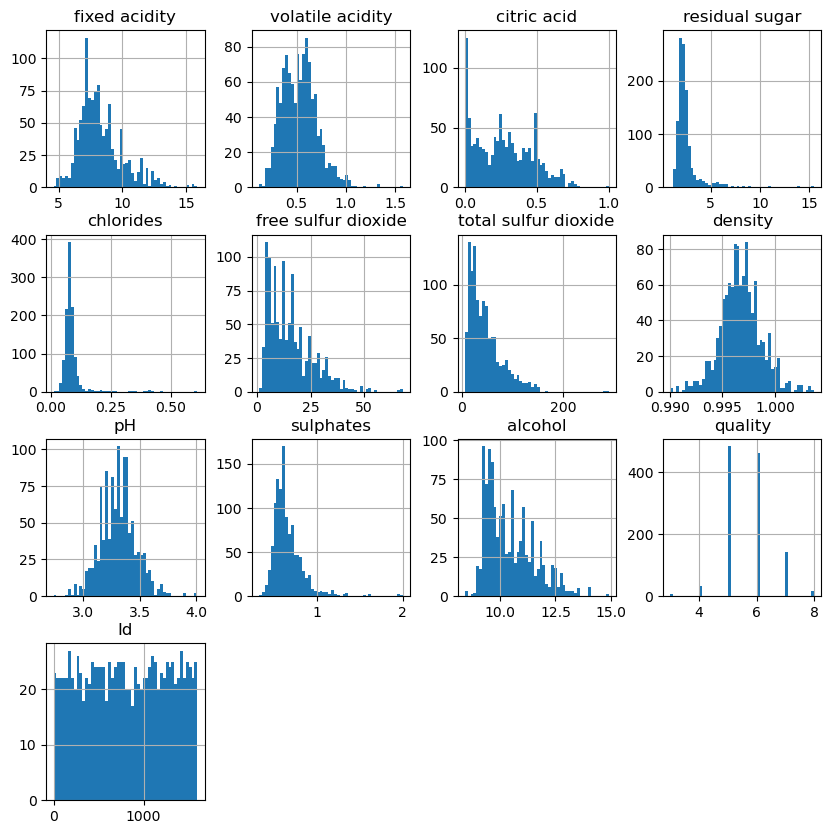

In [9]:
data.hist(figsize=(10, 10), bins = 50)
plt.show()

<Axes: >

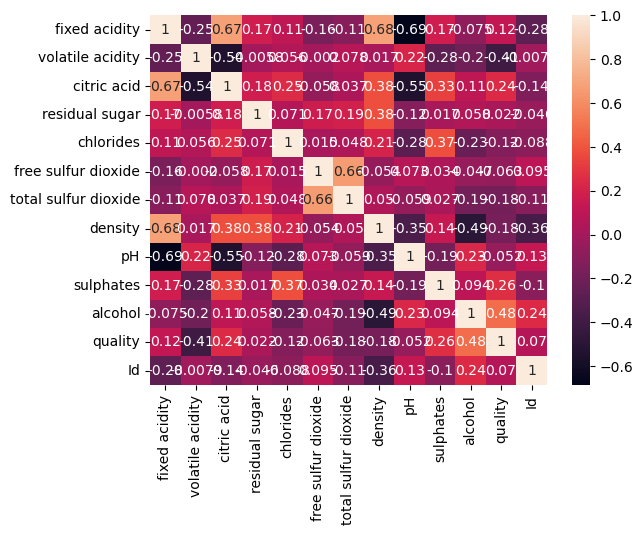

In [10]:
#heatmap
corr = data.corr()
sns.heatmap(corr, annot = True)

In [41]:
X = data.iloc[:,0:11]
Y = data.iloc[:,11]

In [42]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2


In [43]:
Y

0       5
1       5
2       5
3       6
4       5
       ..
1138    6
1139    6
1140    5
1141    6
1142    5
Name: quality, Length: 1143, dtype: int64

In [44]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size = 0.2, random_state=42)

In [45]:
#fitting the simple linear regression model to the training dataset
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [46]:
#test prediction
y_pred = print(regressor.predict(x_test))
y_pred = print(regressor.predict(x_train))

[5.37639096 4.81275231 5.26822711 5.08826518 6.09668676 6.60433542
 5.36417303 5.06978794 5.78461148 5.32382095 6.31298023 6.39721516
 5.3122581  6.20451475 5.86121236 4.84318641 5.69306745 5.70473751
 5.50099506 6.4022271  6.06476494 6.03726349 5.17366124 6.50195777
 5.60352313 5.10641179 6.56067549 5.96071079 5.10316054 5.57954028
 6.20303322 5.47600319 6.59869683 5.73347337 5.55058293 5.26541133
 5.48831034 6.05771316 6.95448756 6.57961946 6.4526993  5.34213598
 7.03445013 5.37970557 5.05503642 5.0554158  5.61860118 5.8525548
 4.63668652 5.68553779 6.42194262 5.26381661 5.60884518 5.88146705
 5.78923411 6.38843403 5.50237456 5.70598277 6.0421496  5.23069794
 5.52701136 5.95270183 5.60755482 6.35884408 6.15031671 5.38044967
 6.86150613 5.26208169 4.8615088  5.98738066 5.74523457 5.33651712
 5.93642512 5.94447105 5.18598015 5.18018033 5.88830754 5.86364764
 5.59329182 5.4312964  5.36245012 5.5735966  6.05382462 5.30356486
 5.53157336 6.00164733 5.36913039 5.69589453 5.71149082 5.29347

In [49]:
#quality(9 out of 10)
print(regressor.predict([[7.4, 0.700, 0.00, 1.9, 0.076, 11.0, 34.0, 0.99780, 3.51, 0.56, 9.4]]))

[5.05813609]


C:\Users\Madhura\Documents\Custom Office Templates\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [50]:
#model evaluation
#ordinary least square principle
import statsmodels.api as sm
x = sm.add_constant(x_train)
model = sm.OLS(y_train, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.382
Model:                            OLS   Adj. R-squared:                  0.375
Method:                 Least Squares   F-statistic:                     50.73
Date:                Tue, 10 Oct 2023   Prob (F-statistic):           1.09e-86
Time:                        13:26:09   Log-Likelihood:                -895.11
No. Observations:                 914   AIC:                             1814.
Df Residuals:                     902   BIC:                             1872.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   34.2098 

In [51]:
#Evaluate our model using MSE criterion
y_pred = regressor.predict(x_test)
print("Mean Squared Error(MSE):", mean_squared_error(y_test, y_pred))

Mean Squared Error(MSE): 0.38003245026277627


In [53]:
#Check quality value from dataset that is listed
print(data['quality'].unique())

[5 6 7 4 8 3]


In [54]:
7.4	0.700	0.00	1.9	0.076	11.0	34.0	0.99780	3.51	0.56	9.4def mape(actual, pred):
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred)/ actual))*100

mape(y_test, y_pred)

#Error of our model is approximately 8-9%(Excellent)
#MAPE result Notes:
# 1. Below 10% = Ex

8.611728389792733